# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

## Esercizio 02.1 - Soluzione proposta 

Quando si vogliono usare i metodi Monte Carlo per il calcolo di integrali puo' essere utile ragionare sulla miglior distribuzione da usare per estrarre i valori $x_i$. 

Dato $$ \langle f(x) \rangle =\int_a^b f(x) dx = \int_a^b g(x)\rho(x) dx$$.

L'errore sulla stima dell'integrale ottenuto effettuando N misure sara' $\epsilon=\frac{\sigma_I}{\sqrt{N}}$ dove $\sigma_I$ e' la varianza della variabile $g(x_i)$. 

Andando pertanto a scegliere una distribuzione $\rho(x)$ quanto piu' simile alla funzione integranda sara' possibile ridurre $\sigma_I$ e di conseguenza l'errore sull'integrale.


Sono di seguito proposte due soluzioni: la prima ottenuta tramite la distribuzione uniforme uniforme, la seconda tramite la distribuzione parabolica $\rho(x)=1-\frac{x^2}{2}$ campionata tramite l'inversa della funzione cumulativa. 

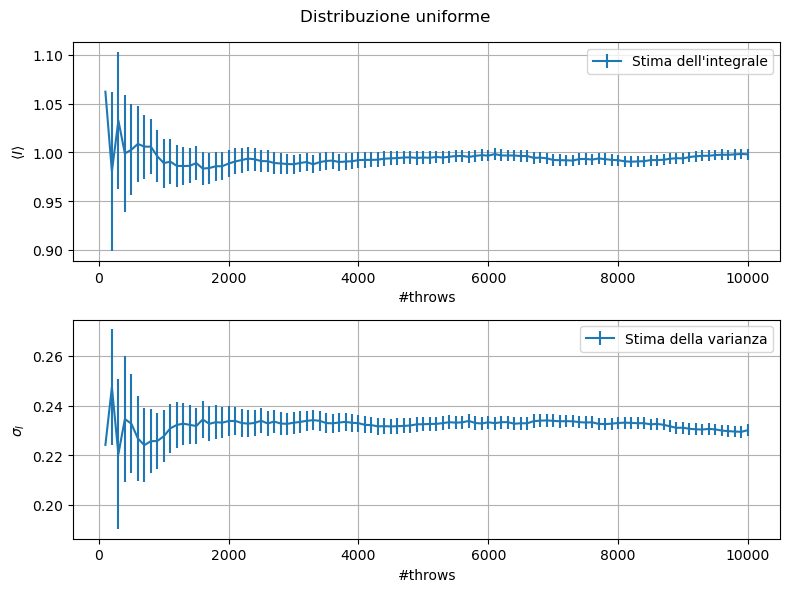

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file "mean.data" e "var1.data"
mean_data = np.loadtxt("mean.data")
var_data = np.loadtxt("var1.data")

# Creazione della figura e degli assi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Grafico 1: Media con errori
ax1.errorbar(mean_data[:,0], mean_data[:,1], yerr=mean_data[:,2], label="Stima dell'integrale")
ax1.set_xlabel('#throws')
ax1.set_ylabel(r'$\langle I \rangle$')
ax1.grid(True)
ax1.legend()

# Grafico 2: Varianza con errori
ax2.errorbar(var_data[:,0], var_data[:,1], yerr=var_data[:,2], label="Stima della varianza")
ax2.set_xlabel('#throws')
ax2.set_ylabel(r'$\sigma_I$')
ax2.grid(True)
ax2.legend()

# Imposta il titolo globale per la figura
fig.suptitle('Distribuzione uniforme')

plt.tight_layout()
plt.show()


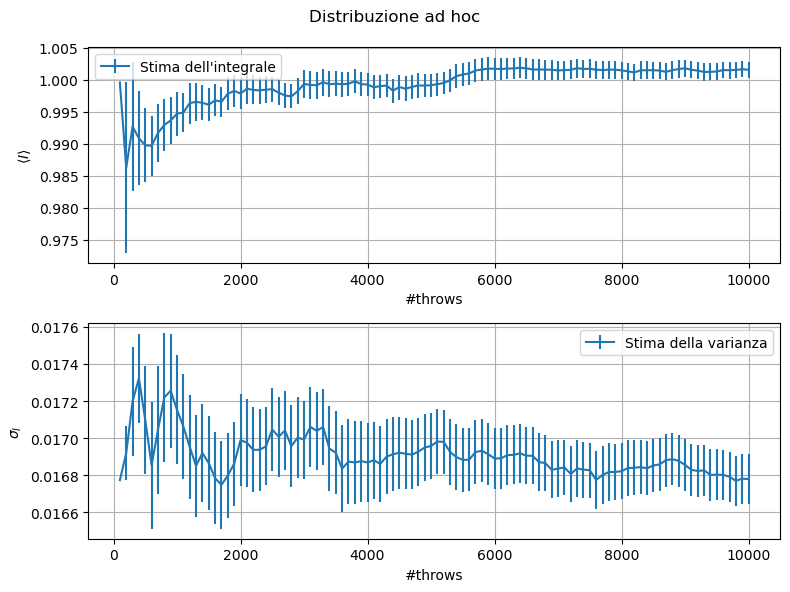

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati dal file "mean.data" e "var1.data"
mean_data = np.loadtxt("mean2.data")
var_data = np.loadtxt("var2.data")

# Creazione della figura e degli assi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Grafico 1: Media con errori
ax1.errorbar(mean_data[:,0], mean_data[:,1], yerr=mean_data[:,2], label="Stima dell'integrale")
ax1.set_xlabel('#throws')
ax1.set_ylabel(r'$\langle I \rangle$')
ax1.grid(True)
ax1.legend()

# Grafico 2: Varianza con errori
ax2.errorbar(var_data[:,0], var_data[:,1], yerr=var_data[:,2], label="Stima della varianza")
ax2.set_xlabel('#throws')
ax2.set_ylabel(r'$\sigma_I$')
ax2.grid(True)
ax2.legend()

# Imposta il titolo globale per la figura
fig.suptitle('Distribuzione ad hoc')

plt.tight_layout()
plt.show()


Come e' possibile notare scegliendo una dsitribuzione piu' simile all'integranda si e' ottenuta ua varianza , e di conseguenza un errore sull'integrale, circa 10 volte piu' piccola

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

## Excercise 02.2 - Soluzione Proposta

Per effettuare la stima $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ sono stati effettuati $M=10^4$ rw da 100 passi ognuno, gli M rw sono stati divisi in $N=100$ blocchi, all'interno di ogni bloccato e' stata fatta la media di $|\vec{r(i)}|^2$, e' poi stata utilizzata la media a blocchi per la stima del valore medio di $\sqrt{\langle |\vec{r}|^2 \rangle_{RW}}$ e per il calcolo dell'errore

Tutto e' stato ripetuto ad ogni passo $i$

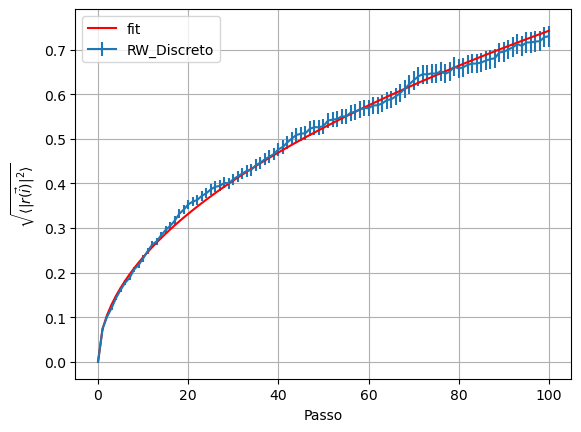

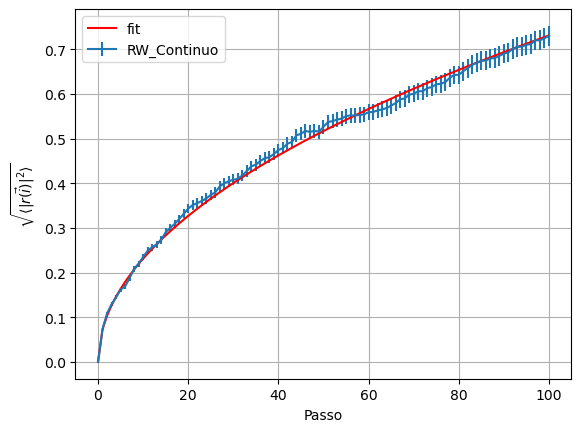

RW Discreto - Coefficients: [0.07422586]
RW Continuo - Coefficients: [0.07310462]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Funzione da fittare
def func(x, a):
    return a * np.sqrt(x)

# Caricamento dei dati e fittazione per RW Discreto
A_discreto = np.loadtxt("rw_discreto.data")
popt_discreto, _ = curve_fit(func, A_discreto[:,0], A_discreto[:,1])

# Plot dei dati e della curva fittata per RW Discreto
plt.errorbar(A_discreto[:,0], A_discreto[:,1], yerr=A_discreto[:,2], label="RW_Discreto")
plt.plot(A_discreto[:,0], func(A_discreto[:,0], *popt_discreto), 'r-', label='fit')
plt.xlabel('Passo')
plt.ylabel(r'$\sqrt{\langle |\vec{r(i)}|^2 \rangle}$')  
plt.grid(True)
plt.legend()
plt.show()

# Caricamento dei dati e fittazione per RW Continuo
A_continuo = np.loadtxt("rw_continuo.data")
popt_continuo, _ = curve_fit(func, A_continuo[:,0], A_continuo[:,1])

# Plot dei dati e della curva fittata per RW Continuo
plt.errorbar(A_continuo[:,0], A_continuo[:,1], yerr=A_continuo[:,2], label="RW_Continuo")
plt.plot(A_continuo[:,0], func(A_continuo[:,0], *popt_continuo), 'r-', label='fit')
plt.xlabel('Passo')
plt.ylabel(r'$\sqrt{\langle |\vec{r(i)}|^2 \rangle}$')  
plt.grid(True)
plt.legend()
plt.show()

# Stampa dei parametri dei fit
print('RW Discreto - Coefficients:', popt_discreto)
print('RW Continuo - Coefficients:', popt_continuo)


## Estrazione uniforme della direzione 

Per svolgere il caso continuo e' necessario estrarre uniformemnte la direzione, la quale e' rappresentata da un punto su una sfera: per fare cio' non basta semplicemnte estrarre $\theta$ tra 0 e $\pi$ e $\phi$ tra 0 e $2\pi$ uniformemente in quanto la "superficie" in cui e' possibile estrare $\phi$ dipende dal parallelo in cui ci si trova.

Tutto cio' e' dovuto dall'espressione dell'angolo solido $d\Omega = \sin(\theta) d\theta d\phi
$

Per risolvere questa problematica l'angolo $\phi$ e' stato estratto uniformemente mentre l'angolo polare $\theta$ e' stato estratto con densita di probabilita' $\rho(\theta)=\sin{\theta}$

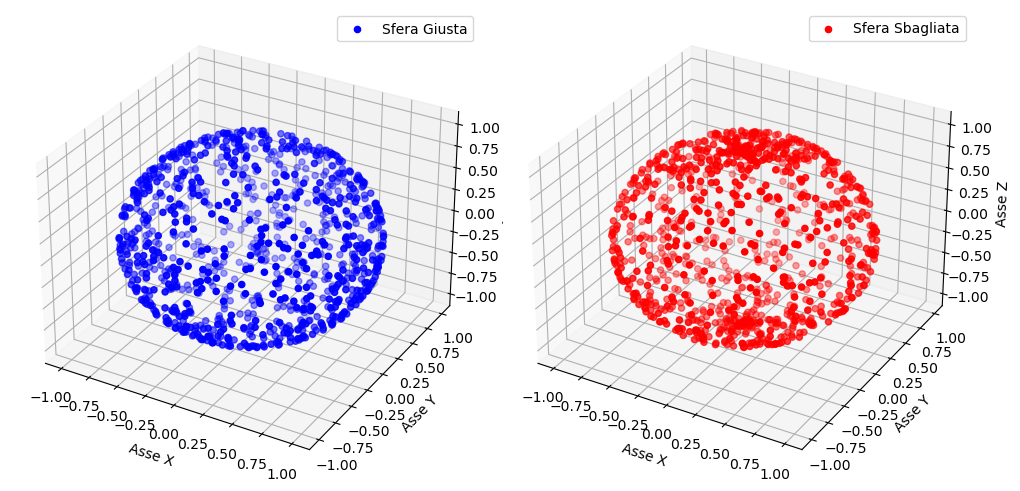

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carica i dati per entrambi i set di punti
punti_giusti = np.loadtxt("sfera_giusta.dat")
punti_sbagliati = np.loadtxt("sfera_sbagliata.dat")

# Grafico per i punti della sfera giusta
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
x_giusti, y_giusti, z_giusti = punti_giusti[:, 0], punti_giusti[:, 1], punti_giusti[:, 2]
ax1.scatter(x_giusti, y_giusti, z_giusti, label="Sfera Giusta", color='blue')
ax1.set_xlabel('Asse X')
ax1.set_ylabel('Asse Y')
ax1.set_zlabel('Asse Z')
ax1.legend()

# Grafico per i punti della sfera sbagliata
ax2 = fig.add_subplot(122, projection='3d')
x_sbagliati, y_sbagliati, z_sbagliati = punti_sbagliati[:, 0], punti_sbagliati[:, 1], punti_sbagliati[:, 2]
ax2.scatter(x_sbagliati, y_sbagliati, z_sbagliati, label="Sfera Sbagliata", color='red')
ax2.set_xlabel('Asse X')
ax2.set_ylabel('Asse Y')
ax2.set_zlabel('Asse Z')
ax2.legend()

plt.tight_layout()
plt.show()


Nel secondo plot si puo' notare una maggior concentrazione di punti ai poli